# ECSE415 - Intro to Computer Vision
## Assignment 1 - Image Filtering
### Alexander Harris - 260688155

# 2. Edge detection
## 2.1 Sobel edge detector

## 1 - Effect of sharpening on edge detection

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

# Import original image in grayscale
img_gray = cv2.imread('data/rice.png', cv2.IMREAD_GRAYSCALE)
img = cv2.imread('data/rice.png')

# Sobel filter applied to rice.png
img_edges_x = cv2.Sobel(img_gray, cv2.CV_32F, 1, 0, ksize=3)
img_edges_y = cv2.Sobel(img_gray, cv2.CV_32F, 0, 1, ksize=3)
img_edges = cv2.magnitude(img_edges_x, img_edges_y)

# Apply threshold to resulting image
_, img_thresh150 = cv2.threshold(img_edges, 150, 255, cv2.THRESH_BINARY)
_, img_thresh200 = cv2.threshold(img_edges, 200, 255, cv2.THRESH_BINARY)

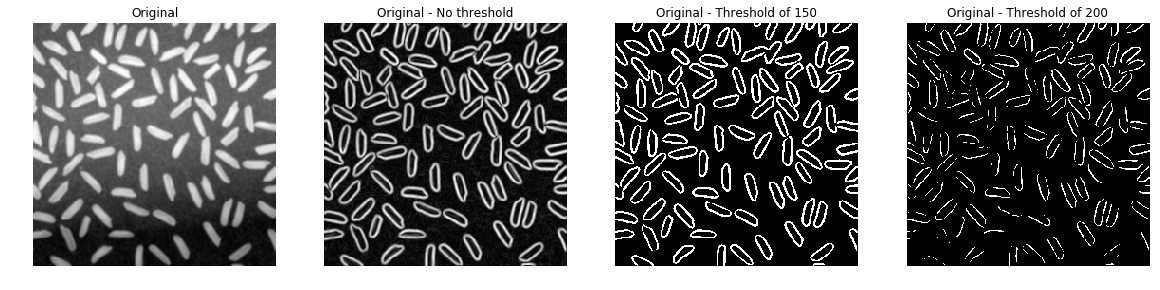

In [2]:
# Display images
plt.figure(figsize=(20, 20))
plt.subplot(141), plt.imshow(img_gray, cmap="gray")
plt.title('Original'), plt.axis('off')
plt.subplot(142), plt.imshow(img_edges, cmap="gray")
plt.title('Original - No threshold'), plt.axis('off')
plt.subplot(143), plt.imshow(img_thresh150, cmap="gray")
plt.title('Original - Threshold of 150'), plt.axis('off')
plt.subplot(144), plt.imshow(img_thresh200, cmap="gray")
plt.title('Original - Threshold of 200'), plt.axis('off')
plt.show()

In [3]:
# Compute sharpened images
box_img = cv2.boxFilter(img, -1, (5,5))
gaussian_img = cv2.GaussianBlur(img, (5,5), math.sqrt(2))

box_details = cv2.subtract(img, box_img)
sharp_box_img = cv2.cvtColor(cv2.add(img, box_details), cv2.COLOR_BGR2GRAY)

gaussian_details = cv2.subtract(img, gaussian_img)
sharp_gaussian_img = cv2.cvtColor(cv2.add(img, gaussian_details), cv2.COLOR_BGR2GRAY)

In [4]:
# Apply Sobel filter to box-sharpened image
box_edges_x = cv2.Sobel(sharp_box_img, cv2.CV_32F, 1, 0, ksize=3)
box_edges_y = cv2.Sobel(sharp_box_img, cv2.CV_32F, 0, 1, ksize=3)
box_edges = cv2.magnitude(box_edges_x, box_edges_y)

# Apply threshold
_, box_thresh150 = cv2.threshold(box_edges, 150, 255, cv2.THRESH_BINARY)
_, box_thresh200 = cv2.threshold(box_edges, 200, 255, cv2.THRESH_BINARY)

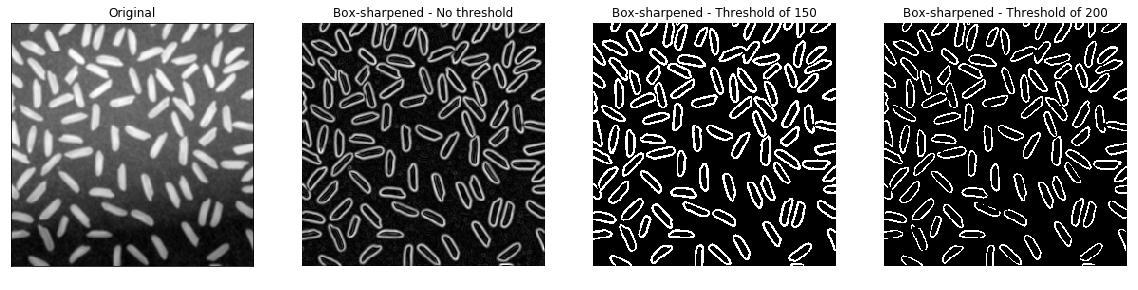

In [5]:
# Display images
plt.figure(figsize=(20, 20))
plt.subplot(141), plt.imshow(img_gray, cmap="gray")
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.imshow(box_edges, cmap="gray")
plt.title('Box-sharpened - No threshold'), plt.axis('off')
plt.subplot(143), plt.imshow(box_thresh150, cmap="gray")
plt.title('Box-sharpened - Threshold of 150'), plt.axis('off')
plt.subplot(144), plt.imshow(box_thresh200, cmap="gray")
plt.title('Box-sharpened - Threshold of 200'), plt.axis('off')
plt.show()

In [6]:
# Apply Sobel filter to Gaussian-sharpened image
gaussian_edges_x = cv2.Sobel(sharp_gaussian_img, cv2.CV_32F, 1, 0, ksize=3)
gaussian_edges_y = cv2.Sobel(sharp_gaussian_img, cv2.CV_32F, 0, 1, ksize=3)
gaussian_edges = cv2.magnitude(gaussian_edges_x, gaussian_edges_y)

# Apply threshold
_, gaussian_thresh150 = cv2.threshold(gaussian_edges, 150, 255, cv2.THRESH_BINARY)
_, gaussian_thresh200 = cv2.threshold(gaussian_edges, 200, 255, cv2.THRESH_BINARY)

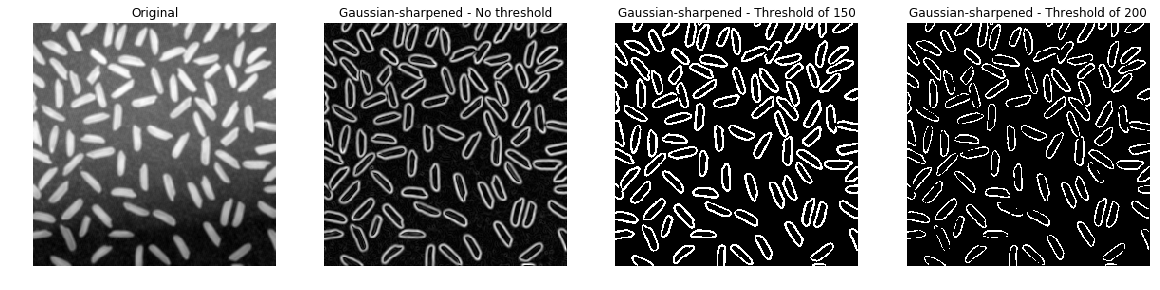

In [7]:
# Display images
plt.figure(figsize=(20, 20))
plt.subplot(141), plt.imshow(img_gray, cmap="gray")
plt.title('Original'), plt.axis('off')
plt.subplot(142), plt.imshow(gaussian_edges, cmap="gray")
plt.title('Gaussian-sharpened - No threshold'), plt.axis('off')
plt.subplot(143), plt.imshow(gaussian_thresh150, cmap="gray")
plt.title('Gaussian-sharpened - Threshold of 150'), plt.axis('off')
plt.subplot(144), plt.imshow(gaussian_thresh200, cmap="gray")
plt.title('Gaussian-sharpened - Threshold of 200'), plt.axis('off')
plt.show()

We can observe that sharpening the images prior was able to improve the edge detection by a significant amount, especially when using 200 as the threshold, we can see that the images originating from both the box and Gaussian sharpened images have much more defined edges.

## 2 - Effect of denoising on edge detection

In [8]:
img_woman = cv2.imread('data/woman.png', cv2.IMREAD_GRAYSCALE)

# Apply Sobel filter to woman image
woman_edges_x = cv2.Sobel(img_woman, cv2.CV_32F, 1, 0, ksize=3)
woman_edges_y = cv2.Sobel(img_woman, cv2.CV_32F, 0, 1, ksize=3)
woman_edges = cv2.magnitude(woman_edges_x, woman_edges_y)

# Compute threshold value
min_val, max_val, min_idx, max_idx = cv2.minMaxLoc(woman_edges)

# Apply threshold
_, woman_thresh10 = cv2.threshold(woman_edges, max_val*0.1, 255, cv2.THRESH_BINARY)
_, woman_thresh20 = cv2.threshold(woman_edges, max_val*0.2, 255, cv2.THRESH_BINARY)

In [9]:
# Denoise using box filter then apply Sobel filter
denoised_woman = cv2.boxFilter(img_woman, -1, (3,3))
dwmn_x = cv2.Sobel(denoised_woman, cv2.CV_32F, 1, 0, ksize=3)
dwmn_y = cv2.Sobel(denoised_woman, cv2.CV_32F, 0, 1, ksize=3)
dwmn_edges = cv2.magnitude(dwmn_x, dwmn_y)

# Compute threshold value
min_val, max_val, min_idx, max_idx = cv2.minMaxLoc(dwmn_edges)

# Apply threshold
_, dwmn_thresh10 = cv2.threshold(dwmn_edges, max_val*0.1, 255, cv2.THRESH_BINARY)
_, dwmn_thresh20 = cv2.threshold(dwmn_edges, max_val*0.2, 255, cv2.THRESH_BINARY)

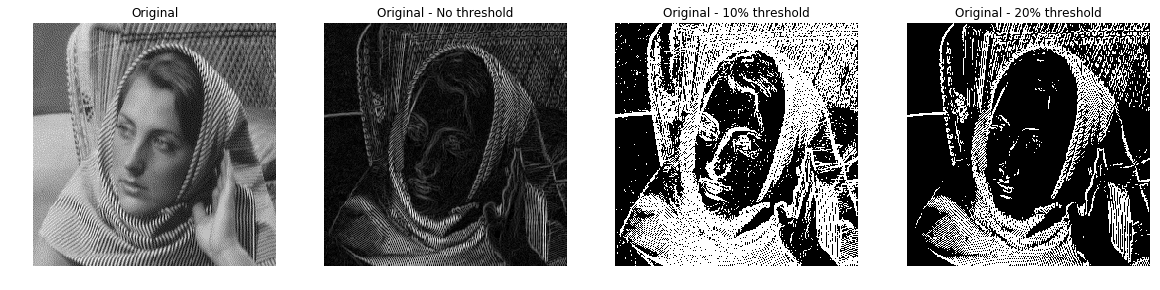

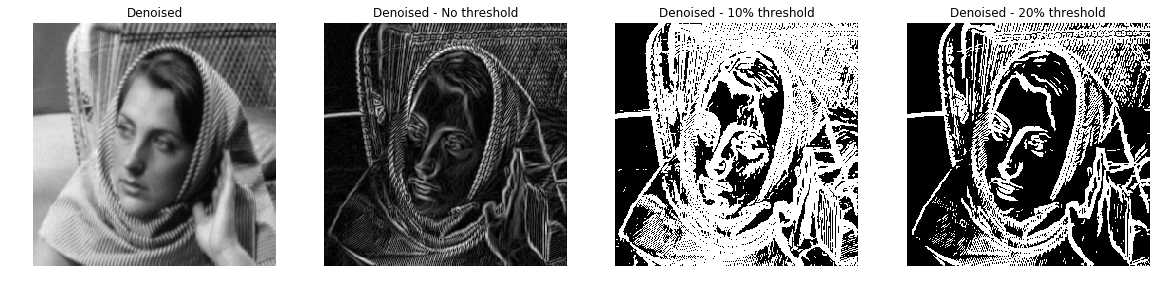

In [10]:
# Display images
plt.figure(figsize=(20, 20))
plt.subplot(141), plt.imshow(img_woman, cmap="gray")
plt.title('Original'), plt.axis('off')
plt.subplot(142), plt.imshow(woman_edges, cmap="gray")
plt.title('Original - No threshold'), plt.axis('off')
plt.subplot(143), plt.imshow(woman_thresh10, cmap="gray")
plt.title('Original - 10% threshold'), plt.axis('off')
plt.subplot(144), plt.imshow(woman_thresh20, cmap="gray")
plt.title('Original - 20% threshold'), plt.axis('off')
plt.show()

plt.figure(figsize=(20, 20))
plt.subplot(141), plt.imshow(denoised_woman, cmap="gray")
plt.title('Denoised'), plt.axis('off')
plt.subplot(142), plt.imshow(dwmn_edges, cmap="gray")
plt.title('Denoised - No threshold'), plt.axis('off')
plt.subplot(143), plt.imshow(dwmn_thresh10, cmap="gray")
plt.title('Denoised - 10% threshold'), plt.axis('off')
plt.subplot(144), plt.imshow(dwmn_thresh20, cmap="gray")
plt.title('Denoised - 20% threshold'), plt.axis('off')
plt.show()

We can observe that denoising prior to performing edge detection significantly improves the detail in the final edge map. This is due to the fact that the presence of noise makes it much harder for the Sobel algorithm to identify edges, as that noise is amplified when taking the derivative.